<a href="https://colab.research.google.com/github/warint/sc-applied-quantitative-finance/blob/master/PCA4QuantInvestStrats_HBAP_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantitative Investment Strategies
## Feature Selection


## Yolande Athaide

In [ ]:
#import sys
#sys.version
#!pip3 install -U google-api-python-client
#!pip3 install --upgrade scikit-learn #== 0.24

In [ ]:
import sys
import os

import sklearn
#from sklearn import datasets		
#from sklearn import svm    	
#from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression
#from sklearn import metrics
#from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['figure.figsize'] = [20, 8]

plt.style.use("ggplot")
#import statsmodels.api as sm
#from statsmodels import regression, stats
#import statsmodels.stats.diagnostic as smd
#from statsmodels import regression
#from statsmodels.tsa.stattools import coint, adfuller

from datetime import datetime


In [ ]:
!pip3 install yfinance
import yfinance as yf
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd




In [ ]:
#pd.core.common.is_list_like = pd.api.types.is_list_like # remove once updated pandas-datareader issue is fixed
# https://github.com/pydata/pandas-datareader/issues/534


# Download data from Yahoo

In [ ]:
# try Yahoo using a new API code yfinance, download dataframe using pandas_datareader   
#prices_indx = pdr.get_data_yahoo(['SPY', '^GSPC','^DJI','^IXIC','^RUT', '^TNX'], start ='2010-01-01',end=None)
prices_yf = pdr.get_data_yahoo(['IBM','AAPL','CSCO','MSFT','INTC','WMT','SHLDQ','GE','MMM','AMZN','XOM'], start ='2012-01-01',end='2019-10-01')

#print(prices_yf.sort_index().head())
prices_yf

Attributes   Adj Close                        ...     Volume                       
Symbols            IBM       AAPL       CSCO  ...        MMM       AMZN         XOM
Date                                          ...                                  
2012-01-03  134.881241  12.650659  14.035937  ...  3380100.0  5110800.0  20906800.0
2012-01-04  134.330948  12.718646  14.307162  ...  3007400.0  4205200.0  16130900.0
2012-01-05  133.693863  12.859850  14.254426  ...  3116400.0  3809100.0  17452800.0
2012-01-06  132.158981  12.994284  14.201690  ...  2839200.0  7008400.0  15942100.0
2012-01-09  131.471176  12.973674  14.292099  ...  2796600.0  5056900.0  11664200.0
...                ...        ...        ...  ...        ...        ...         ...
2019-09-25  132.665604  54.538898  46.882156  ...  2758200.0  3493200.0   8035200.0
2019-09-26  133.027023  54.257603  46.145039  ...  2763300.0  3536800.0   8420200.0
2019-09-27  132.739746  53.993587  46.154488  ...  2870300.0  3907200.0   8224000.0
2019-09-30  134.759933  55.264339  46.693150  ...  2508500.0  2644700.0   9768900.0
2019-10-01  133.128983  55.417320  45.114979  ...  3271500.0  3084500.0  10279100.0

[1949 rows x 66 columns]

# Question 1 - Extract the Adj Close prices and define them in a new variable

In [ ]:
print(list(prices_yf.columns))

[('Adj Close', 'IBM'), ('Adj Close', 'AAPL'), ('Adj Close', 'CSCO'), ('Adj Close', 'MSFT'), ('Adj Close', 'INTC'), ('Adj Close', 'WMT'), ('Adj Close', 'SHLDQ'), ('Adj Close', 'GE'), ('Adj Close', 'MMM'), ('Adj Close', 'AMZN'), ('Adj Close', 'XOM'), ('Close', 'IBM'), ('Close', 'AAPL'), ('Close', 'CSCO'), ('Close', 'MSFT'), ('Close', 'INTC'), ('Close', 'WMT'), ('Close', 'SHLDQ'), ('Close', 'GE'), ('Close', 'MMM'), ('Close', 'AMZN'), ('Close', 'XOM'), ('High', 'IBM'), ('High', 'AAPL'), ('High', 'CSCO'), ('High', 'MSFT'), ('High', 'INTC'), ('High', 'WMT'), ('High', 'SHLDQ'), ('High', 'GE'), ('High', 'MMM'), ('High', 'AMZN'), ('High', 'XOM'), ('Low', 'IBM'), ('Low', 'AAPL'), ('Low', 'CSCO'), ('Low', 'MSFT'), ('Low', 'INTC'), ('Low', 'WMT'), ('Low', 'SHLDQ'), ('Low', 'GE'), ('Low', 'MMM'), ('Low', 'AMZN'), ('Low', 'XOM'), ('Open', 'IBM'), ('Open', 'AAPL'), ('Open', 'CSCO'), ('Open', 'MSFT'), ('Open', 'INTC'), ('Open', 'WMT'), ('Open', 'SHLDQ'), ('Open', 'GE'), ('Open', 'MMM'), ('Open', 'AMZN

In [ ]:
prices_yf_adj_close = prices_yf["Adj Close"]
prices_yf_adj_close.head()

Symbols,IBM,AAPL,CSCO,MSFT,INTC,WMT,SHLDQ,GE,MMM,AMZN,XOM
Date,,,,,,,,,,,
2012-01-03,134.881241,12.650659,14.035937,21.799267,18.647131,48.455952,23.722122,13.900859,64.857773,179.029999,59.593678
2012-01-04,134.330948,12.718646,14.307162,22.312283,19.080259,47.957977,23.246624,14.052279,65.393768,177.509995,59.607536
2012-01-05,133.693863,12.859850,14.254426,22.540291,19.300613,47.725063,22.733385,14.044711,65.098595,177.610001,59.427364
2012-01-06,132.158981,12.994284,14.201690,22.890448,19.186634,47.387714,22.039007,14.120420,64.764534,182.610001,58.983871
2012-01-09,131.471176,12.973674,14.292099,22.589146,19.353809,47.532295,22.408838,14.279417,65.152969,178.559998,59.247211


# Features Data

In [ ]:
import os 
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

#!ls "/content/drive/My Drive/Colab Notebooks/QuantFi"

Mounted at /content/drive


In [ ]:
# Get data

data_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/QuantFi/keystats.csv", index_col="Date")
data_df.dropna(axis=0, how="any", inplace=True)

features = data_df.columns[6:]
data_features = data_df[features]
X = data_df[features].values

In [ ]:
features

Index(['Market Cap', 'Enterprise Value', 'Trailing P/E', 'Forward P/E',
       'PEG Ratio', 'Price/Sales', 'Price/Book', 'Enterprise Value/Revenue',
       'Enterprise Value/EBITDA', 'Profit Margin', 'Operating Margin',
       'Return on Assets', 'Return on Equity', 'Revenue', 'Revenue Per Share',
       'Qtrly Revenue Growth', 'Gross Profit', 'EBITDA',
       'Net Income Avl to Common', 'Diluted EPS', 'Qtrly Earnings Growth',
       'Total Cash', 'Total Cash Per Share', 'Total Debt', 'Total Debt/Equity',
       'Current Ratio', 'Book Value Per Share', 'Operating Cash Flow',
       'Levered Free Cash Flow', 'Beta', '50-Day Moving Average',
       '200-Day Moving Average', 'Avg Vol (3 month)', 'Shares Outstanding',
       'Float', '% Held by Insiders', '% Held by Institutions',
       'Shares Short (as of', 'Short Ratio', 'Short % of Float',
       'Shares Short (prior month)'],
      dtype='object')

In [ ]:
data_features.head()

,Market Cap,Enterprise Value,Trailing P/E,Forward P/E,PEG Ratio,Price/Sales,Price/Book,Enterprise Value/Revenue,Enterprise Value/EBITDA,Profit Margin,Operating Margin,Return on Assets,Return on Equity,Revenue,Revenue Per Share,Qtrly Revenue Growth,Gross Profit,EBITDA,Net Income Avl to Common,Diluted EPS,Qtrly Earnings Growth,Total Cash,Total Cash Per Share,Total Debt,Total Debt/Equity,Current Ratio,Book Value Per Share,Operating Cash Flow,Levered Free Cash Flow,Beta,50-Day Moving Average,200-Day Moving Average,Avg Vol (3 month),Shares Outstanding,Float,% Held by Insiders,% Held by Institutions,Shares Short (as of,Short Ratio,Short % of Float,Shares Short (prior month)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-07-11,6.350000e+09,7.080000e+09,19.13,17.79,1.49,1.74,3.09,1.94,9.904,9.30,15.92,10.58,16.01,3.650000e+09,22.561,8.2,1.450000e+09,7.143700e+08,3.395400e+08,2.09,0.2,1.574900e+08,0.993,8.835200e+08,0.430,1.662,12.961,4.730400e+08,2.936100e+08,1.65,39.09,39.30,1064470.0,1.586500e+08,1.355800e+08,17.81,64.7,4970000.0,4.2,3.7,4490000.0
2013-04-26,5.480000e+09,6.550000e+09,18.46,16.09,1.75,1.30,2.59,1.55,8.910,7.26,13.06,8.17,14.24,4.240000e+09,33.780,6.3,1.740000e+09,7.351600e+08,3.053700e+08,2.42,-1.7,2.456900e+08,2.010,1.310000e+09,61.460,3.010,17.360,5.304900e+08,4.074700e+08,0.81,44.39,42.70,580981.0,1.225200e+08,1.023700e+08,16.36,74.6,5060000.0,8.0,5.6,5860000.0
2006-10-23,6.630000e+09,7.360000e+09,20.60,16.72,1.24,1.90,3.23,2.11,10.701,9.55,16.04,10.86,16.11,3.490000e+09,21.062,11.0,1.450000e+09,6.877600e+08,3.337200e+08,2.01,8.3,1.748900e+08,1.089,8.569200e+08,0.418,1.933,12.775,4.708600e+08,6.542600e+08,1.89,39.91,39.51,803655.0,1.605600e+08,1.339700e+08,14.54,64.0,3970000.0,5.6,2.9,4220000.0
2006-09-05,6.110000e+09,6.670000e+09,19.58,15.57,1.09,1.80,2.97,1.96,9.893,9.61,16.07,10.54,15.61,3.400000e+09,20.265,12.2,1.450000e+09,6.739600e+08,3.271800e+08,1.94,10.8,2.414500e+08,1.503,7.987400e+08,0.383,2.860,12.795,4.618900e+08,6.310500e+08,1.87,36.07,39.94,894611.0,1.606600e+08,1.340600e+08,17.35,64.2,4220000.0,3.9,3.1,3690000.0
2008-11-02,8.428000e+10,1.270000e+11,13.56,10.83,1.70,0.90,1.70,1.32,3.955,6.49,18.35,5.67,12.45,9.655000e+10,33.752,4.1,5.592000e+10,3.220000e+10,6.270000e+09,2.19,31.3,1.670000e+09,0.589,4.478000e+10,0.879,0.677,17.938,2.737000e+10,3.700000e+09,0.86,30.00,34.48,19325800.0,2.840000e+09,2.820000e+09,0.02,63.5,28290000.0,1.1,1.0,31810000.0


# Normalizing the features

# Question 2 .  Rescale the features data by normalisation 

In [ ]:
# Getting rid of the NaN values.
#data_features.dropna(how='any', inplace=True)

# Normalizing features  (i.e. transform on the min-max method)
#from sklearn import preprocessing
#scaler = preprocessing.MinMaxScaler()
#cols_2_norm = data_features.values
#cols_2_norm_scaled = scaler.fit_transform(cols_2_norm)

#data_features_N = pd.DataFrame(cols_2_norm_scaled)
#data_features_N = pd.DataFrame(preprocessing.normalize(data_features), columns = data_features.columns)#.set_index(data_features.index)

data_features_N = (data_features - data_features.mean())/data_features.std()
features_tickers = data_features_N.columns.values
data_features_N.head()

,Market Cap,Enterprise Value,Trailing P/E,Forward P/E,PEG Ratio,Price/Sales,Price/Book,Enterprise Value/Revenue,Enterprise Value/EBITDA,Profit Margin,Operating Margin,Return on Assets,Return on Equity,Revenue,Revenue Per Share,Qtrly Revenue Growth,Gross Profit,EBITDA,Net Income Avl to Common,Diluted EPS,Qtrly Earnings Growth,Total Cash,Total Cash Per Share,Total Debt,Total Debt/Equity,Current Ratio,Book Value Per Share,Operating Cash Flow,Levered Free Cash Flow,Beta,50-Day Moving Average,200-Day Moving Average,Avg Vol (3 month),Shares Outstanding,Float,% Held by Insiders,% Held by Institutions,Shares Short (as of,Short Ratio,Short % of Float,Shares Short (prior month)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-07-11,-0.584125,-0.533403,-0.037601,0.335917,-0.015473,-0.251078,-0.073177,-0.252684,-0.074393,-0.311074,-0.202408,0.333214,-0.103983,-0.475966,-0.454161,-0.268511,-0.495458,-0.549228,-0.508897,-0.433318,-0.118788,-0.454984,-0.353532,-0.261804,-0.150830,-0.158579,-0.307378,-0.534912,-0.298793,0.653053,-0.309681,-0.310838,-0.554926,-0.541302,-0.542689,0.966233,-0.316599,-0.479174,0.449033,0.036054,-0.497108
2013-04-26,-0.596196,-0.539198,-0.041017,0.134544,0.001203,-0.413417,-0.090344,-0.390003,-0.195389,-0.505754,-0.456606,-0.110947,-0.113925,-0.467302,-0.205583,-0.348212,-0.483639,-0.547269,-0.514759,-0.339891,-0.122474,-0.445718,-0.280244,-0.251637,0.053530,0.673160,-0.130440,-0.528317,-0.279786,-0.498610,-0.228507,-0.257407,-0.591110,-0.562127,-0.562829,0.847530,-0.029780,-0.475843,2.009798,0.453964,-0.445817
2006-10-23,-0.580240,-0.530341,-0.030107,0.209171,-0.031508,-0.192046,-0.068371,-0.192827,0.022624,-0.287216,-0.191743,0.384818,-0.103422,-0.478316,-0.487374,-0.151057,-0.495458,-0.551735,-0.509895,-0.455967,-0.103072,-0.453156,-0.346614,-0.262438,-0.150870,0.008633,-0.314860,-0.535163,-0.238588,0.982100,-0.297122,-0.307538,-0.574445,-0.540201,-0.543665,0.698538,-0.336879,-0.516188,1.024052,-0.139908,-0.507216
2006-09-05,-0.587455,-0.537886,-0.035307,0.072947,-0.041129,-0.228941,-0.077297,-0.245642,-0.075732,-0.281491,-0.189076,0.325842,-0.106230,-0.479638,-0.505033,-0.100720,-0.495458,-0.553035,-0.511017,-0.475785,-0.098222,-0.446163,-0.316780,-0.263825,-0.150987,0.580607,-0.314055,-0.536192,-0.242463,0.954679,-0.355934,-0.300780,-0.567638,-0.540144,-0.543611,0.928575,-0.331085,-0.506935,0.325815,-0.095917,-0.527059
2008-11-02,0.497161,0.777920,-0.065999,-0.488530,-0.002004,-0.560997,-0.120900,-0.470986,-0.798547,-0.579236,0.013571,-0.571694,-0.123979,0.888370,-0.206203,-0.440496,1.724371,2.416819,0.508511,-0.405007,-0.058448,-0.296084,-0.382646,0.784659,-0.149326,-0.766340,-0.107192,2.552938,0.269849,-0.430059,-0.448901,-0.386583,0.811729,1.004186,1.085229,-0.490122,-0.351365,0.383990,-0.824223,-0.557817,0.525717


In [ ]:
# Generate the train set and test set by random split
X_train, X_test = train_test_split(data_features_N,  test_size=0.2)

# PCA 

In [ ]:
# Applying Principle Component Analysis
# Creating covariance matrix and training data on PCA.
cov_matrix = X_train.loc[:,features].cov()
#num_pc = 11 
pca = PCA()
pca.fit(cov_matrix)

PCA()

3 principal components explain 75.00% of variance


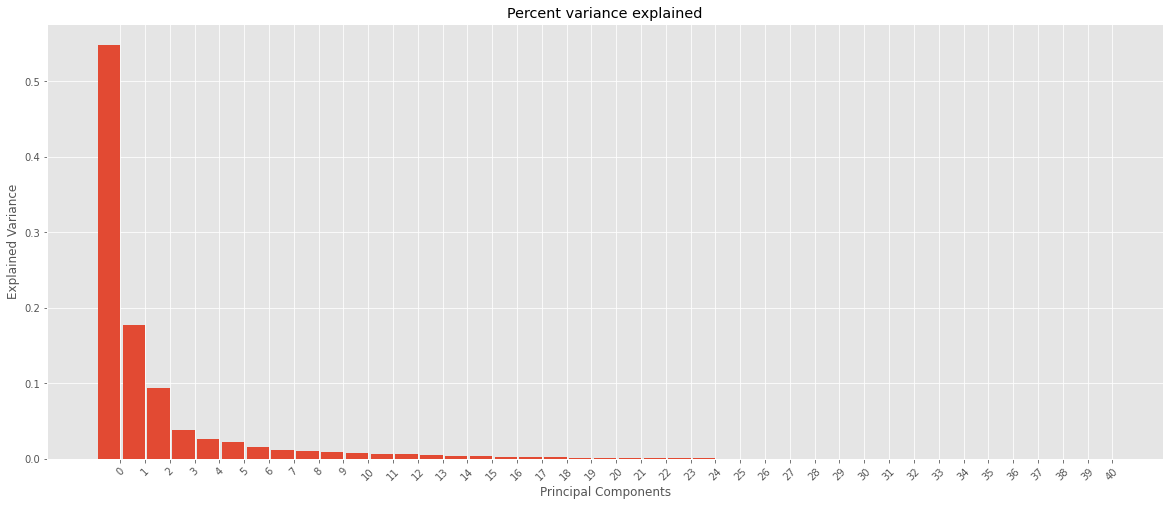

In [ ]:
def plotPCA(plot=False):

    # Visualizing Variance against number of principal components.
    cov_matrix = X_train.loc[:,features].cov()

    var_threshold = 0.75
    var_explained = np.cumsum(pca.explained_variance_ratio_)
    num_comp = np.where(np.logical_not(var_explained < var_threshold))[0][0] + 1  

    if plot:
        print('%d principal components explain %.2f%% of variance' %(num_comp, 100* var_threshold))

        # PCA percent variance explained.
        bar_width = 0.9
        n_asset = features_tickers.shape[0]
        x_indx = np.arange(n_asset)
        fig, ax = plt.subplots()

        # Eigenvalues measured as percentage of explained variance.
        rects = ax.bar(x_indx, pca.explained_variance_ratio_[:n_asset], bar_width)
        ax.set_xticks(x_indx + bar_width / 2)
        ax.set_xticklabels(list(range(n_asset)), rotation=45)
        ax.set_title('Percent variance explained')
        ax.set_ylabel('Explained Variance')
        ax.set_xlabel('Principal Components')
        plt.show()

plotPCA(plot=True)

In [ ]:
projected = pca.fit_transform(cov_matrix)
pcs = pca.components_

# Question 3. Construct the PCS Weights: 
### Fill in the formula below for the weights and produce the graph *below*

{'weights': array([-1.06878217e-02, -1.68189358e-02, -2.26455691e-02,  1.83942207e-02,
        -4.28182258e-03, -1.06207495e-02,  8.93373083e-02,  3.13958835e-01,
        -1.56225725e-01, -2.95992770e-02,  2.62975244e-01,  7.81247707e-02,
         2.86017951e-01, -6.37419737e-02,  1.06776472e-01,  7.90874359e-02,
         7.33006307e-02, -7.34838391e-02,  6.53982741e-02, -3.76911626e-02,
         6.76368582e-02, -1.25973994e-03, -1.41872995e-02,  2.90043128e-02,
        -2.28615368e-02,  2.47639486e-03, -8.97964290e-03,  1.78522899e-02,
        -1.19848569e-03, -3.35500516e-02, -3.29670343e-03,  3.77545213e-03,
         7.08076469e-04, -2.38359324e-03, -5.51899626e-03,  5.67603202e-04,
        -2.15238269e-04, -2.26332948e-03,  1.52068695e-02,  1.15469506e-02,
        -6.34456952e-04])}

Sum of weights of current eigenvalue-portfolio: 1.00


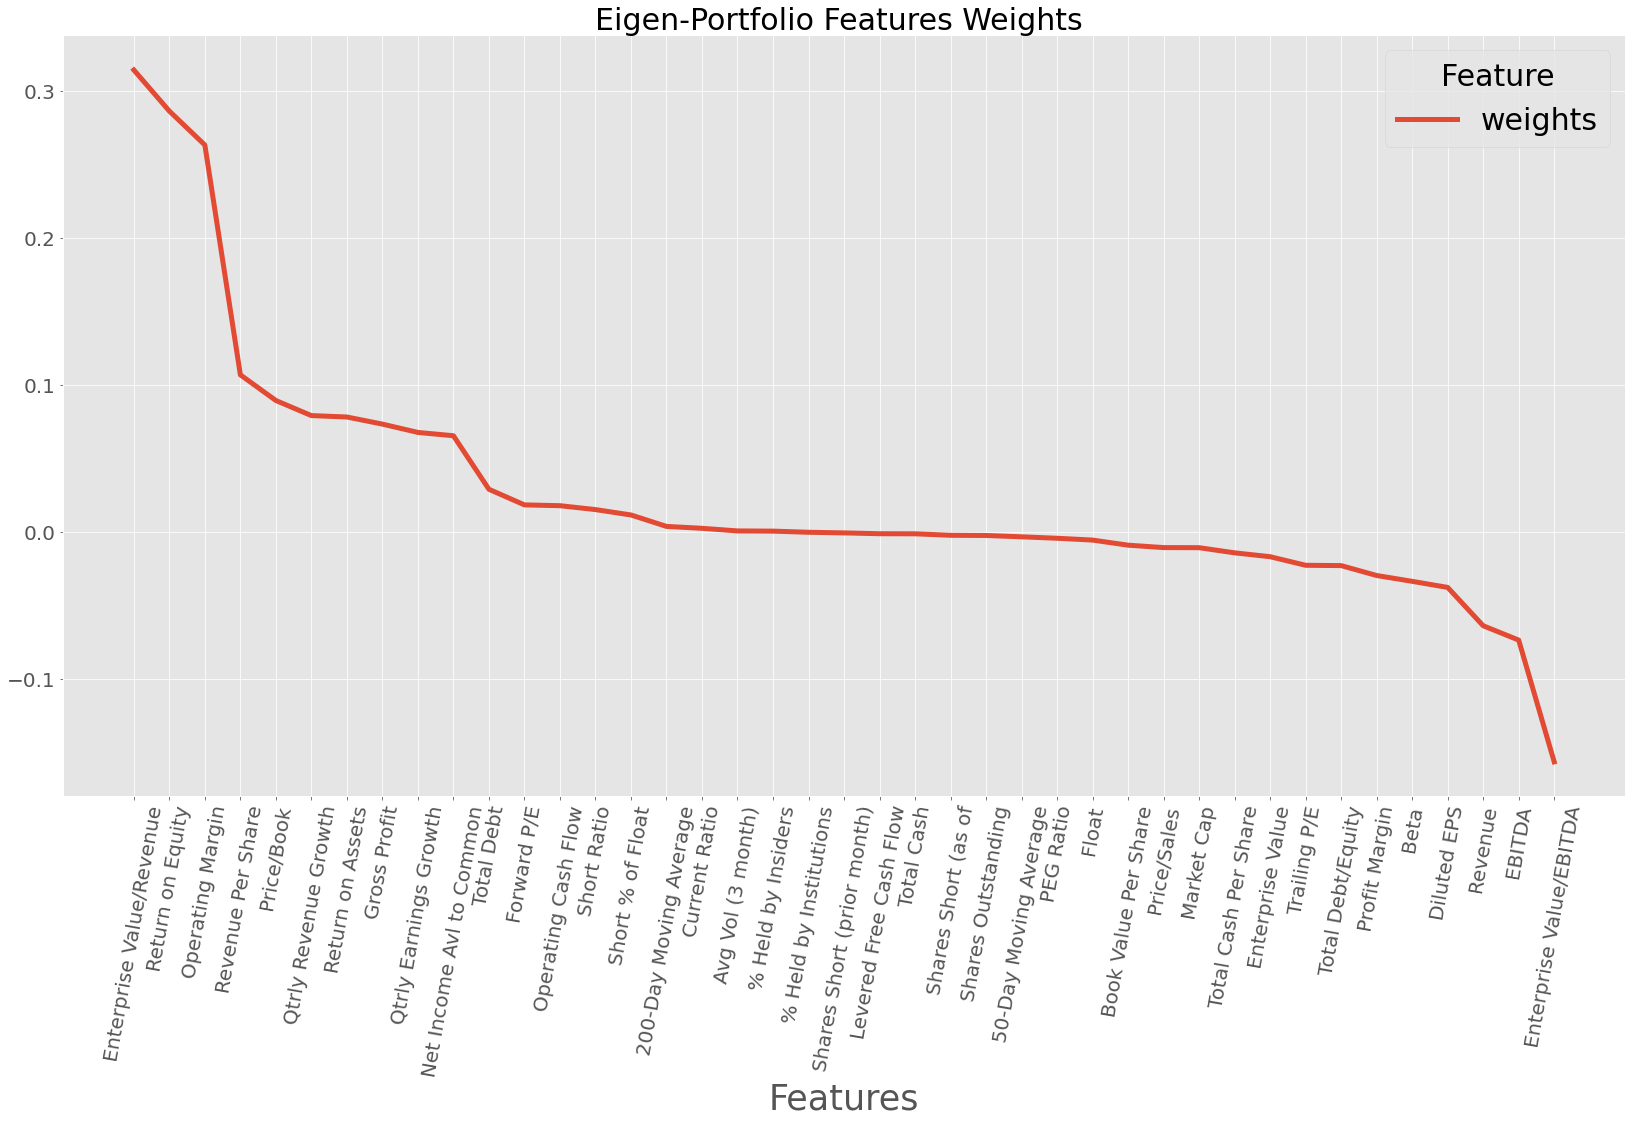

,weights
Enterprise Value/Revenue,0.313959
Return on Equity,0.286018
Operating Margin,0.262975
Revenue Per Share,0.106776
Price/Book,0.089337
Qtrly Revenue Growth,0.079087
Return on Assets,0.078125
Gross Profit,0.073301
Qtrly Earnings Growth,0.067637
Net Income Avl to Common,0.065398


In [ ]:
def PCWeights():
    '''
    Principal Components (PC) weights for each 41 PCs
    '''
    weights = pd.DataFrame()

    for i in range(len(pcs)):
        weights["weights_{}".format(i)] = pcs[:, i]/sum(pcs[:, i])

    weights = weights.values.T
    return weights

weights = PCWeights()
portfolio = portfolio = pd.DataFrame()

topPCAs = pd.DataFrame()

def PlotWeights(weights, plot=False, portfolio=portfolio):
    
    data_features_N = {'weights': weights.squeeze()}
    display(data_features_N)
    portfolio = pd.DataFrame(data_features_N, index = features_tickers) 
    portfolio.sort_values(by= ['weights'] , ascending=False, inplace=True)
    sortedportfolio = portfolio.sort_values(by= ['weights'] , ascending=False, inplace=True)
    
    if plot:
        print('Sum of weights of current eigenvalue-portfolio: %.2f' % np.sum(portfolio))
        ax = portfolio.plot(title='Current Eigenvalue -Portfolio Weights', 
            figsize=(28,14), 
            xticks=range(0, len(features_tickers),1), 
            rot=80, 
            linewidth=5
            )
        
    plt.tick_params(labelsize = 20)
    plt.xlabel('Features', fontsize=35)
    plt.grid(True)
    plt.title('Eigen-Portfolio Features Weights ',fontdict={'fontsize':30})
    legend = ax.legend(loc=0, ncol=1, bbox_to_anchor=(0, 0, 1,1),fancybox=True,shadow=False,title='Feature',prop={'size':30})
    plt.setp(legend.get_title(),fontsize='30')
    plt.show()

    return portfolio

PlotWeights(weights=weights[4], plot=True)